In [1]:
# Three Observable Trends:

# Observation 1: Southern Hemisphere climates tend to be slightly milder than those at similar latitudes in the Northern Hemisphere.

# Observation 2: Highest temperature is found at 0 latitude and as the latidude increases or decreases, temperature drops. 
    
# Observation 3: Latitude doesn't have a strong influence on wind speed. 


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress


from api_keys import api_key


from citipy import citipy

output_data_file = "output.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    

    if city not in cities:
        cities.append(city)
len(cities)

628

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : lorengau
Processing Record 2 of Set 1 : vaini
Processing Record 3 of Set 1 : busselton
Processing Record 4 of Set 1 : rawson
Processing Record 5 of Set 1 : albany
Processing Record 6 of Set 1 : feijo
City not found. Skipping...
Processing Record 7 of Set 1 : ribeira grande
Processing Record 8 of Set 1 : namibe
Processing Record 9 of Set 1 : punta arenas
City not found. Skipping...
Processing Record 10 of Set 1 : tosno
Processing Record 11 of Set 1 : mataura
Processing Record 12 of Set 1 : bredasdorp
Processing Record 13 of Set 1 : thompson
Processing Record 14 of Set 1 : hofgeismar
Processing Record 15 of Set 1 : saint-philippe
Processing Record 16 of Set 1 : rafraf
Processing Record 17 of Set 1 : ushuaia
Processing Record 18 of Set 1 : kapaa
Processing Record 19 of Set 1 : atuona
Processing Record 20 of Set 1 : kelvington
Processing Record 21 of Set 1 : saint george
Processing Record 22 of Set 1 : w

Processing Record 33 of Set 4 : san quintin
Processing Record 34 of Set 4 : sfantu gheorghe
Processing Record 35 of Set 4 : tiksi
Processing Record 36 of Set 4 : jalingo
City not found. Skipping...
Processing Record 37 of Set 4 : hit
Processing Record 38 of Set 4 : farrukhnagar
Processing Record 39 of Set 4 : erdaojiang
Processing Record 40 of Set 4 : vilyuysk
Processing Record 41 of Set 4 : lasa
City not found. Skipping...
Processing Record 42 of Set 4 : lavrentiya
City not found. Skipping...
Processing Record 43 of Set 4 : mitsamiouli
City not found. Skipping...
Processing Record 44 of Set 4 : vendome
City not found. Skipping...
Processing Record 45 of Set 4 : sao joao do piaui
Processing Record 46 of Set 4 : faya
Processing Record 47 of Set 4 : hasaki
Processing Record 48 of Set 4 : el dorado
Processing Record 49 of Set 4 : novoilinsk
Processing Record 50 of Set 4 : kodiak
Processing Record 0 of Set 5 : zhigansk
Processing Record 1 of Set 5 : sola
Processing Record 2 of Set 5 : sald

Processing Record 17 of Set 8 : nouadhibou
Processing Record 18 of Set 8 : te anau
Processing Record 19 of Set 8 : kahului
Processing Record 20 of Set 8 : darnah
Processing Record 21 of Set 8 : krasnoarmeysk
Processing Record 22 of Set 8 : ginir
Processing Record 23 of Set 8 : san vicente
Processing Record 24 of Set 8 : sibu
City not found. Skipping...
Processing Record 25 of Set 8 : chekhov
Processing Record 26 of Set 8 : cayenne
Processing Record 27 of Set 8 : abonnema
Processing Record 28 of Set 8 : tucumcari
Processing Record 29 of Set 8 : san cristobal
City not found. Skipping...
Processing Record 30 of Set 8 : camocim
Processing Record 31 of Set 8 : olutanga
Processing Record 32 of Set 8 : zhuhai
Processing Record 33 of Set 8 : sao filipe
Processing Record 34 of Set 8 : wukari
Processing Record 35 of Set 8 : kadaya
Processing Record 36 of Set 8 : sur
Processing Record 37 of Set 8 : victor harbor
Processing Record 38 of Set 8 : svetlogorsk
Processing Record 39 of Set 8 : mehran
Pr

Processing Record 2 of Set 12 : fairbanks
Processing Record 3 of Set 12 : luganville
Processing Record 4 of Set 12 : petropavlovsk-kamchatskiy
Processing Record 5 of Set 12 : digha
Processing Record 6 of Set 12 : maxixe
Processing Record 7 of Set 12 : mount darwin
Processing Record 8 of Set 12 : kieta
Processing Record 9 of Set 12 : winchester
Processing Record 10 of Set 12 : sokolskoye
Processing Record 11 of Set 12 : bay roberts
Processing Record 12 of Set 12 : jiuquan
Processing Record 13 of Set 12 : panzhihua
Processing Record 14 of Set 12 : cardoso
Processing Record 15 of Set 12 : krasnoselkup
-----------------------------
Data Retrieval Complete
-----------------------------


In [5]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [6]:
weather_dict.count()

City          576
Cloudiness    576
Country       576
Date          576
Humidity      576
Lat           576
Lng           576
Max Temp      576
Wind Speed    576
dtype: int64

In [7]:

weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lorengau,100,PG,1640318228,85,-2.0226,147.2712,79.75,21.39
1,Vaini,20,TO,1640318229,89,-21.2000,-175.2000,86.16,8.05
2,Busselton,20,AU,1640318230,32,-33.6500,115.3333,88.05,5.79
3,Rawson,30,AR,1640318231,41,-43.3002,-65.1023,76.30,22.10
4,Albany,98,US,1640318213,60,42.6001,-73.9662,24.94,3.58
...,...,...,...,...,...,...,...,...,...
571,Bay Roberts,65,CA,1640318959,79,47.5999,-53.2648,32.32,17.00
572,Jiuquan,0,CN,1640318960,56,39.7432,98.5174,22.73,3.49
573,Panzhihua,36,CN,1640318961,64,26.5851,101.7128,57.00,2.21
574,Cardoso,99,BR,1640318962,88,-20.0819,-49.9142,72.10,6.98


In [8]:

weather_dict.to_csv("output.csv", index = False)

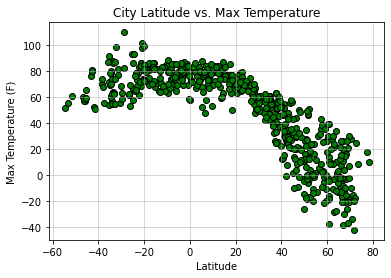

In [9]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "green", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Graphs_Plots/ City Latitude vs Max Temperature.png")

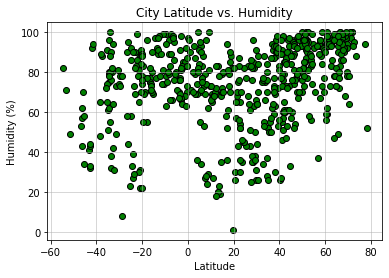

In [10]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "green", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Graphs_Plots/ Latitude vs Humidity.png")

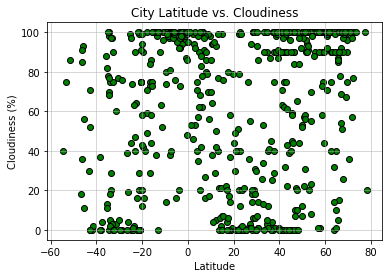

In [11]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "green", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Graphs_Plots/ Latitude vs Cloudiness.png")

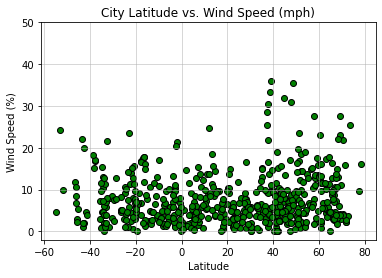

In [12]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "green", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Graphs_Plots/ Latitude vs Wind Speed (mph).png")

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [14]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.87


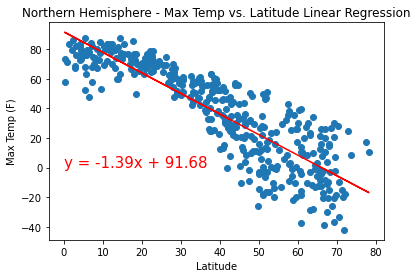

In [16]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Graphs_Plots/ Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The r-squared is : 0.39


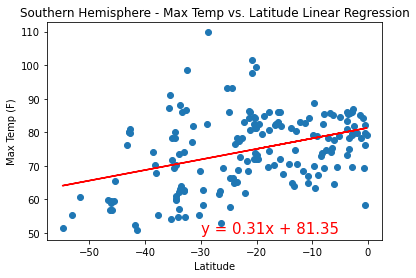

In [17]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Graphs_Plots/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The r-squared is : 0.4


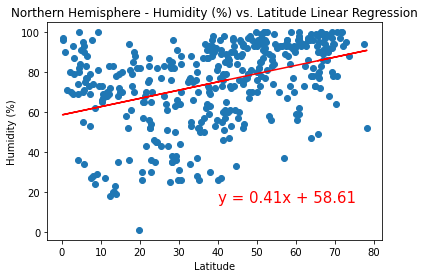

In [18]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Graphs_Plots/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

The r-squared is : 0.35


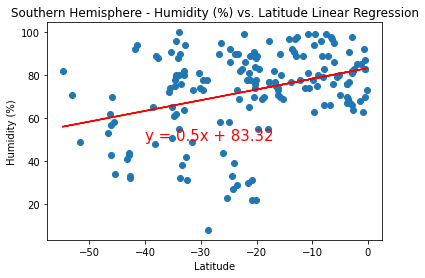

In [19]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Graphs_Plots/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

The r-squared is : 0.27


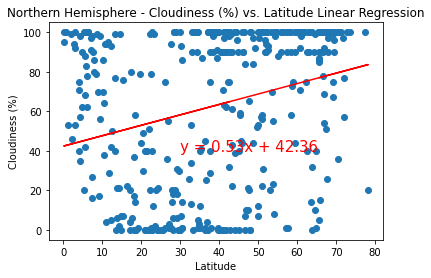

In [20]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Graphs_Plots/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

The r-squared is : 0.46


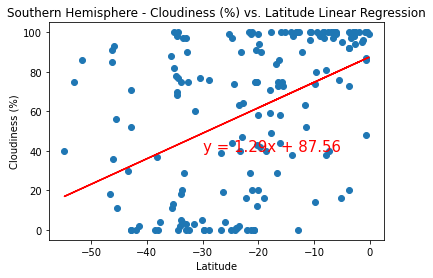

In [21]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Graphs_Plots/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

The r-squared is : 0.2


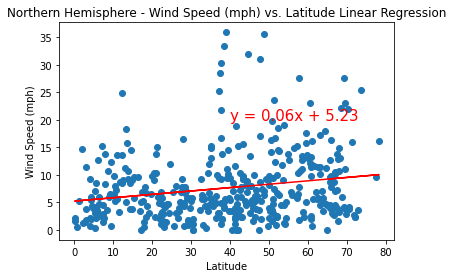

In [22]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Graphs_Plots/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The r-squared is : -0.13


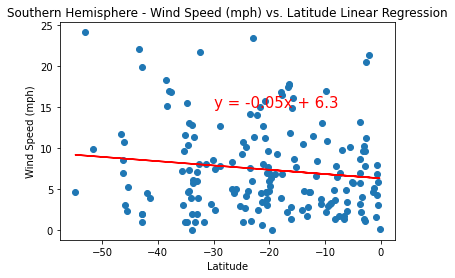

In [23]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Graphs_Plots/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")